Projet :

Vous devez créer un pipeline d'apprentissage automatique, basé sur les réseau de neurones, sur la tâche Visual Question Answering (VQA). Ceci comprend:*
- Creation d'un modèle
- Creation d'un dataloader
- Entraînement selon les splits
- Test sur le split de test
- Ecriture d'un rapport Scientifique

**Creation d'un modèle**

Les images sont de tailles 124x124. Les modèles classiques proposés par pytorch prennent en entrée des images de taille 224x224. <br/>
Nous voulons un modèle qui prennent en entrée les images de tailles 112x112.

Ce modèle encode l'image avec un CNN, et intègre la question dans le pipeline.

**Creation d'un dataloader**
  - sentence embedding (lente forward pass, il est judicieux de calculer cette représentation que une fois sachant que le modèle est pré-entrainé (et fixé).
  - il faut passer d'image 124x124 en 112x112, ceci permet de faire de la data-augementation (randomresizecrop, randomflip, ...)
  - Le data loader retourne, au moins, la question, l'image et le label

**Entraînement selon les splits**

Il faut créer une procédure d'entrainement et selectionner votre meilleur modèle. Vous aurez surement besoin des methodes torch.save et torch.load pour gérer la sauvegarde de vos modèles.

Il y a plein de manières d'améliorer votre entrainement, voici quelques pistes :
  - crop dataloader (image augmentation)
  - dropout
  - Model ensembling
  - Lr scheduler
  - Early stop

Pour plus de facilités, vous pouvez directement connecter votre google drive a votre colab.
https://colab.research.google.com/notebooks/io.ipynb

 **Pas permis:**<br/>
 - Scale l'image en 224x224 et utiliser un réseau préentrainé


**Ne pas oublier**
- net.train(), net.eval() ne calcule pas les gradients et le dropout

**PS:**
Utiliser adam optimizer comme pour la scéance CNN.

**Test sur le split de test**:
Pour la compétition, il faut reporter la réponse choisie par le modèle (argmax) (cf sample_submission.csv).<br/>
Pour le rapport, il faut reporter l'accuracy top-1 (donnée par le argmax, i.e. cette réponse est elle la bonne réponse) et l'accuracy top-5 (la bonne réponse se trouve-elle dans les 5 plus grandes confiances données par votre modèle? )

**Ecriture d'un rapport Scientifique**

Au minimum, expliquer les points ci-dessus.

**Cela *peut* comprendre**:
- Explorez le jeu de données, donnez des exemples pour quelques classes, la distribution des labels (sous forme de graph ?)
- Quand vous prenez une decision (par exemple, data augementation), montrez visuellement l'effet de cette décision
- Expliquez votre réseau, que sont des convolution et du pooling, mettez des figures, expliquez votre stratégie pour définir la taille des filtres, etc..
- Montrez l'évolution de vos résultats par epoch (sous forme de graph ?), plottez l'accuracy, et la loss. Quelle stratégie d'apprentissage utilisez vous (lr scheduler, early stop, ...)
- Si vous utilisez du dropout, model ensembling, autre technique : explication et effet de cette technique, ...
- **PS: on a surement pas le temps de tout faire ! Concentrez vous sur certains points, et montrez leur impact (qu'il soit négatif ou positif, c'est ca la science...)**

In [ ]:

!file=1pfd5-i_F20zViKIYwbQ8jL1p78s_E6uX && wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='${file} -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="${file} -O images.zip && rm -rf /tmp/cookies.txt \
&& unzip -qq images.zip && \
git clone https://github.com/jbdel/miniVQA

--2020-11-29 20:38:31--  https://docs.google.com/uc?export=download&confirm=YsRr&id=1pfd5-i_F20zViKIYwbQ8jL1p78s_E6uX
Resolving docs.google.com (docs.google.com)... 74.125.195.100, 74.125.195.138, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-94-docs.googleusercontent.com/docs/securesc/2dajbt2np8uvdunlqn19ekl4tvbpqb8g/eipd808u5p9apclsp2v7sk4373l1dbgk/1606682250000/06540366866019348016/12743757123326371388Z/1pfd5-i_F20zViKIYwbQ8jL1p78s_E6uX?e=download [following]
--2020-11-29 20:38:31--  https://doc-0s-94-docs.googleusercontent.com/docs/securesc/2dajbt2np8uvdunlqn19ekl4tvbpqb8g/eipd808u5p9apclsp2v7sk4373l1dbgk/1606682250000/06540366866019348016/12743757123326371388Z/1pfd5-i_F20zViKIYwbQ8jL1p78s_E6uX?e=download
Resolving doc-0s-94-docs.googleusercontent.com (doc-0s-94-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting

In [ ]:
!ls && ls -d miniVQA/*

image124  images.zip  miniVQA  sample_data
miniVQA/answer_list.txt      miniVQA/sample_submission.csv  miniVQA/val.csv
miniVQA/image_question.json  miniVQA/test.csv
miniVQA/README.md	     miniVQA/train.csv


## **Overview dataset**

In [ ]:
!wc -l miniVQA/*.csv

  6288 miniVQA/sample_submission.csv
  6288 miniVQA/test.csv
 50300 miniVQA/train.csv
  6300 miniVQA/val.csv
 69176 total


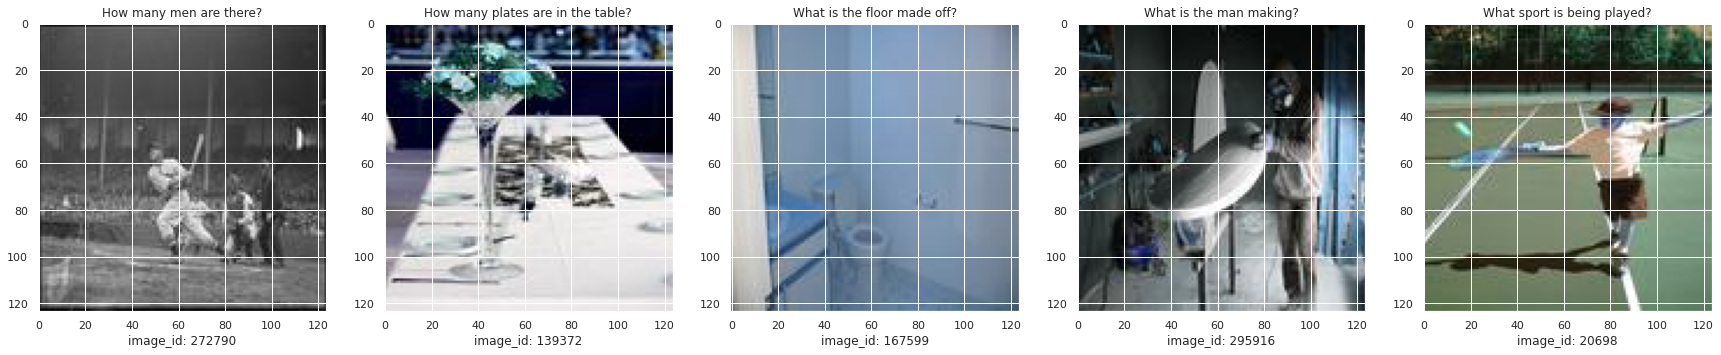

In [ ]:
import json
import random
import matplotlib.pyplot as plt
import cv2

image_question = json.load(open('miniVQA/image_question.json'))
plt.figure(figsize=([30, 20]))

for i in range(5):
  plt.subplot(1, 5, i+1)
  random_image = random.choice(list(image_question.keys()))
  _, random_question = random.choice(image_question[random_image])
  plt.imshow(cv2.resize(cv2.imread('image124/'+random_image+'.jpg'), (124,124)))
  plt.xlabel('image_id: '+random_image)
  plt.title(random_question)

## **Sentence Embedding**

In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer
import time

model = SentenceTransformer('distilbert-base-nli-mean-tokens').cuda() # ne pas toucher

sentences = 'This framework generates embeddings for each input sentence word hello ok'
time_start = time.time()
sentence_embeddings = model.encode(sentences)
print(time.time()-time_start)
print(sentence_embeddings.shape)

100%|██████████| 245M/245M [00:17<00:00, 13.8MB/s]


0.10193204879760742
(768,)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Index(['id', 'label'], dtype='object')
['banana', 'soccer', 'trees', 'bus', 'male', 'cow', 'wine', 'flowers', 'tan', 'umbrella', 'winter', 'bear', 'camera', 'walking', 'sitting', 'metal', 'female', 'tile', '20', 'brick', 'outside', 'plane', 'car', 'clear', 'night', 'cloudy', 'donu']
27


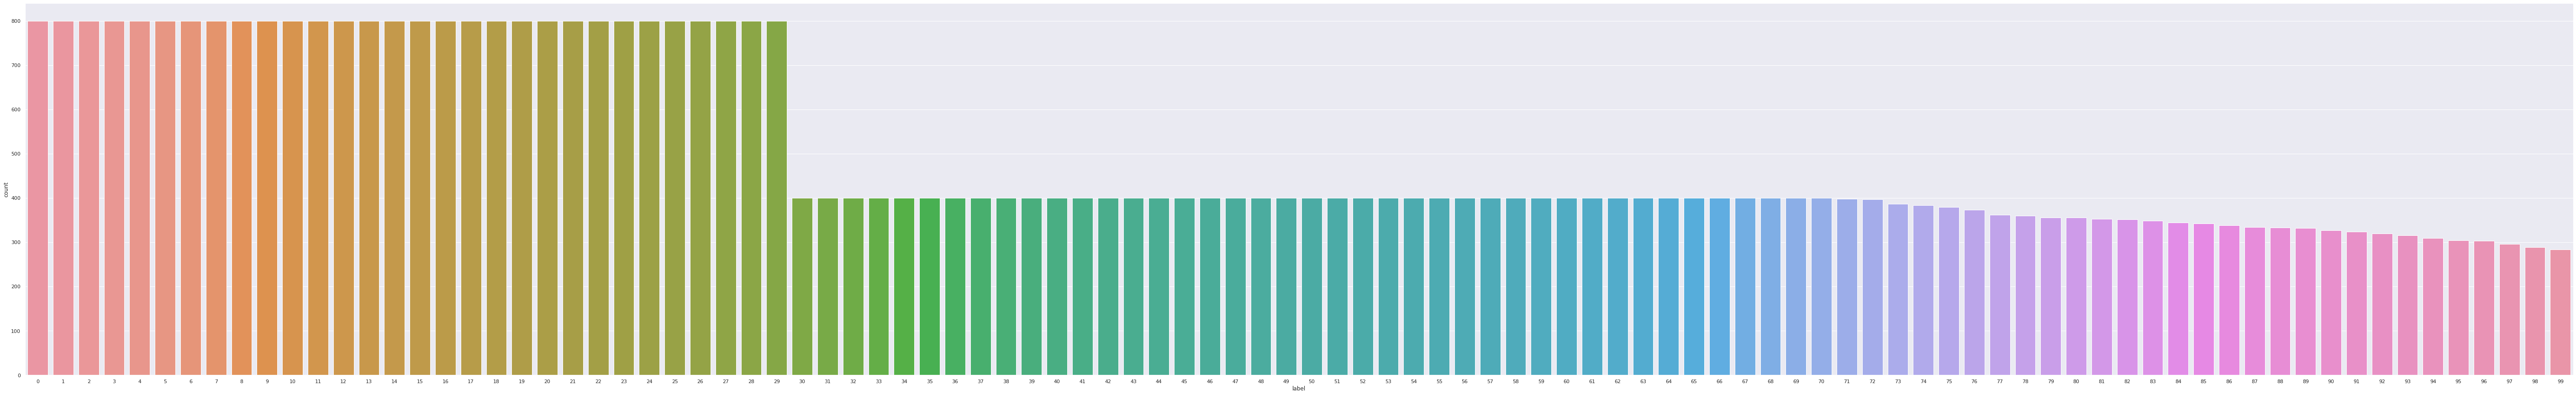

In [ ]:
import pandas as pd
import seaborn as sns
import json 

# READ CSV TRAIN & VAL
train_df = pd.read_csv('miniVQA/train.csv')
val_df = pd.read_csv('miniVQA/val.csv')
test_df = pd.read_csv('miniVQA/test.csv')



sns.countplot(train_df['label'])

# TRANSFORM TO DICT: QUESTION_ID -> LABEL_ID
train_dict = dict(zip(train_df.id, train_df.label))
val_dict = dict(zip(val_df.id, val_df.label))
test_dict = dict(zip(test_df.id, val_df.label))

print(train_df.columns)

with open("miniVQA/answer_list.txt", "r") as labels_file:
  # array of labels (index is the ID)
  labels = [line[:-1] for line in labels_file]

print(labels[73:])
print(len(labels[73:]))

splits = {
  "train": train_dict,
  "val": val_dict,
  "test": test_dict
}

# Create dict question_id -> [question, image_id]
question_id_to_question_and_image_id_dict = {}
with open('miniVQA/image_question.json') as json_file:
    data = json.load(json_file)
    for image_id, list_question_tuple in data.items():
      for question_tuple in list_question_tuple:
        question_id_to_question_and_image_id_dict[question_tuple[0]] = [question_tuple[1], image_id]

def get_image_id_from_question_id(question_id):
  image_id = question_id_to_question_and_image_id_dict[question_id][1]
  return image_id

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# EXCECUTER 1 SEULE FOIS POUR ECRIRE SUR UN FICHIER JSON: QUESTION_ID => TRANSFORMED_QUESTION
'''
import json
from json import JSONEncoder
import numpy

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, numpy.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

transformed_questions_dict = {}

for question_id, [question, image_id] in question_id_to_question_and_image_id_dict.items():
  transformed_question = model.encode(question)
  transformed_questions_dict[question_id] = transformed_question

with open("/content/drive/My Drive/transformed_questions.json", "w") as outfile:  
    json.dump(transformed_questions_dict, outfile, cls=NumpyArrayEncoder)
'''

In [ ]:
# READ TRANSFORMED QUESTION JSON FILE: QUESTION_ID -> TRANSFORMED_QUESTION
with open('/content/drive/My Drive/transformed_questions.json') as json_file: 
  transformed_questions_dict = json.load(json_file)

### Dataloader

In [ ]:
import glob
import os
import torch
import torch.nn as nn
from PIL import Image
from torchvision.transforms import *
import numpy as np

class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, split):
        assert split in  ["train", "val","test"]
        
        self.split = split
        self.image_dir = "image124"
        self.images = []
        self.questions = []
        self.questionsId = []
        self.labels = []
        self.transform = transforms.Compose([transforms.Resize([112, 112]), transforms.ToTensor()])
        
        
        question_ids = splits[split].keys()

        for question_id in question_ids:
          self.questions.append(question_id)
          self.images.append(os.path.join(self.image_dir, str(get_image_id_from_question_id(question_id)) + '.jpg'))
          self.questionsId.append(question_id)
          
  def __len__(self):
        'Denotes the total number of samples'
        return len(self.images)

  def __getitem__(self, index):
        'Generates one sample of data'
        img_path = self.images[index]
        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)
        question = np.asarray(transformed_questions_dict[str(self.questions[index])], dtype='float32')

        
        if self.split == "test":
          questionId = np.asarray(self.questionsId[index], dtype= np.int64)
          

        if not self.split == "test":
          label = splits[self.split][self.questions[index]]
          label = np.array(label)
          return img, question, label

        return img, question, questionId
      

In [ ]:
train_dataset = Dataset(split="train")
val_dataset = Dataset(split="val")


print("Nombre d'images pour dataset train", len(train_dataset))
print("Nombre d'images pour dataset val", len(val_dataset))

Nombre d'images pour dataset train 50300
Nombre d'images pour dataset val 6300


In [ ]:
# 44s par EPOCH
start = time.time()
for sample in training_generator:
  pass
end = time.time()
print(end - start)

NameError: ignored

### Train

In [ ]:
import torch as torch
import torch.optim as optim
import matplotlib.pyplot as plt

def train(net,batch_size=32, learning_rate=1e-4, num_epochs=5):
  loss_func = torch.nn.CrossEntropyLoss()
  optimizer = optim.Adam(net.parameters(), lr=learning_rate)

  training_generator = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
  test_generator = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
  
  
  scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=0, verbose=True)

  

  accuracy_val_epoch = []
  accuracy_train_epoch = []

  loss_val_epoch = []
  for i in range(num_epochs):
    net.train() # nouveau
    losses = []
    accuracy_training = []
    for j, sample in enumerate(training_generator):
      img, question, label = sample

      optimizer.zero_grad()
      out = net(img.cuda(), question.cuda())
      loss = loss_func(out, label.cuda())
      losses.append(loss.item())

      loss.backward()
      torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=1)
      best = np.argmax(out.data.cpu().numpy(), axis=-1)
      bestTop5 = np.argmax(out.data.cpu().numpy()[:5], axis=-1)
      accuracy_training.append(np.mean(best == label.data.cpu().numpy()))
      optimizer.step()
      
      
      print('\r Epoch', i, 'Step', j , ':' , str(loss.data.cpu().numpy()), end="")

    accuracy_train_epoch.append(np.mean(accuracy_training) * 100)
    print(accuracy_training[0])
    net.eval() # nouveau
    accuracy = []
    for j, sample in enumerate(test_generator):
      img, question, label = sample

      out = net(img.cuda(), question.cuda())
      best = np.argmax(out.data.cpu().numpy(), axis=-1)
      accuracy.append(np.mean(best == label.data.cpu().numpy()))
      
    mean_loss = sum(accuracy)/len(accuracy)
    scheduler.step(mean_loss)

    print('\n Accuracy is ' , str(np.mean(accuracy)*100))
    accuracy_val_epoch.append(np.mean(accuracy) * 100)
    loss_val_epoch.append(np.mean(losses) * 100)

  print("done")

  plt.plot(np.array(range(0,num_epochs)),np.array(accuracy_val_epoch), label ='val')
  plt.plot(np.array(range(0,num_epochs)),np.array(accuracy_train_epoch), label ='train')
  plt.legend()
  plt.show()

  plt.plot(np.array(range(0,num_epochs)),np.array(loss_val_epoch), label ='loss')
  plt.legend()
  plt.show()


### Network

In [ ]:
import torch.nn.functional as F
class Network(nn.Module):

  def __init__(self, dropout, num_classes=None):
    super(Network, self).__init__()
    self.features = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=64, kernel_size=11, stride=4, padding=2),
      nn.BatchNorm2d(64),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
      nn.Conv2d(in_channels=64, out_channels=192, kernel_size=5, stride=1, padding=2),
      nn.BatchNorm2d(192),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
      nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, stride=1, padding=1),
      nn.BatchNorm2d(384),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
      nn.BatchNorm2d(256),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3, stride=2),
      
    )

        
    self.classifier = nn.Sequential(
      nn.Linear(1792, 512),
      nn.Linear(512, num_classes),
      nn.Dropout(dropout),

    )

  def forward(self, image: torch.Tensor, question: torch.Tensor):
    x = image
    x = self.features(x)
    x = torch.flatten(x, start_dim=1)
    x = torch.cat([x, question], dim=1)
    
    x = self.classifier(x)
    return x

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


 Epoch 0 Step 2095 : 4.00799470.041666666666666664

 Accuracy is  31.606463878326995
 Epoch 1 Step 2095 : 3.44469380.25

 Accuracy is  34.42648922686946
 Epoch 2 Step 2095 : 3.69718240.375

 Accuracy is  36.72370088719899
 Epoch 3 Step 2095 : 3.1507360.3333333333333333

 Accuracy is  37.9277566539924
 Epoch 4 Step 2095 : 2.9360080.25

 Accuracy is  39.242712294043095
 Epoch 5 Step 2095 : 3.27782750.5
Epoch     6: reducing learning rate of group 0 to 1.0000e-05.

 Accuracy is  39.11596958174905
 Epoch 6 Step 2095 : 3.16600940.25

 Accuracy is  41.52408111533586
 Epoch 7 Step 2095 : 2.87983730.4166666666666667

 Accuracy is  41.840937896070976
 Epoch 8 Step 2095 : 3.2294560.4166666666666667

 Accuracy is  41.872623574144484
 Epoch 9 Step 2095 : 3.29542970.5833333333333334

 Accuracy is  42.173637515842834
 Epoch 10 Step 2095 : 3.2102590.5

 Accuracy is  42.39543726235742
 Epoch 11 Step 2095 : 2.77327970.4583333333333333
Epoch    12: reducing learning rate of group 0 to 1.0000e-06.

 Accu

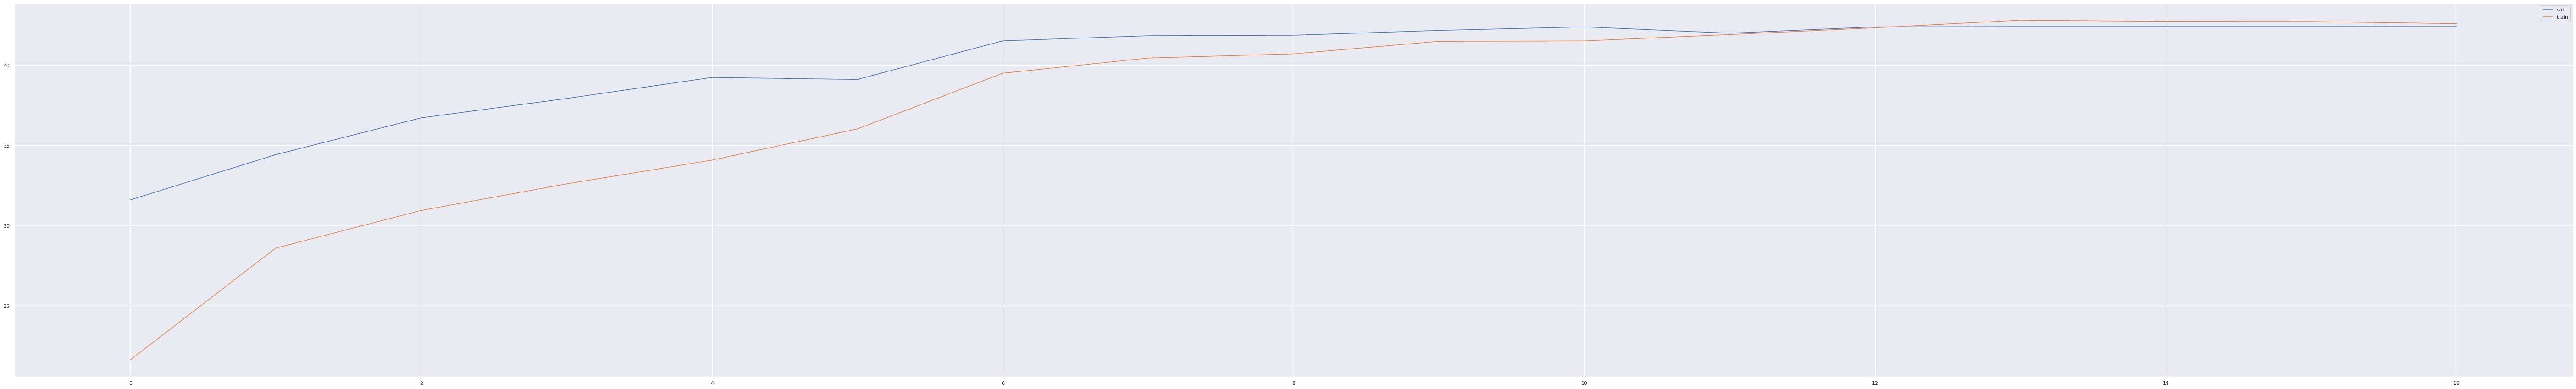

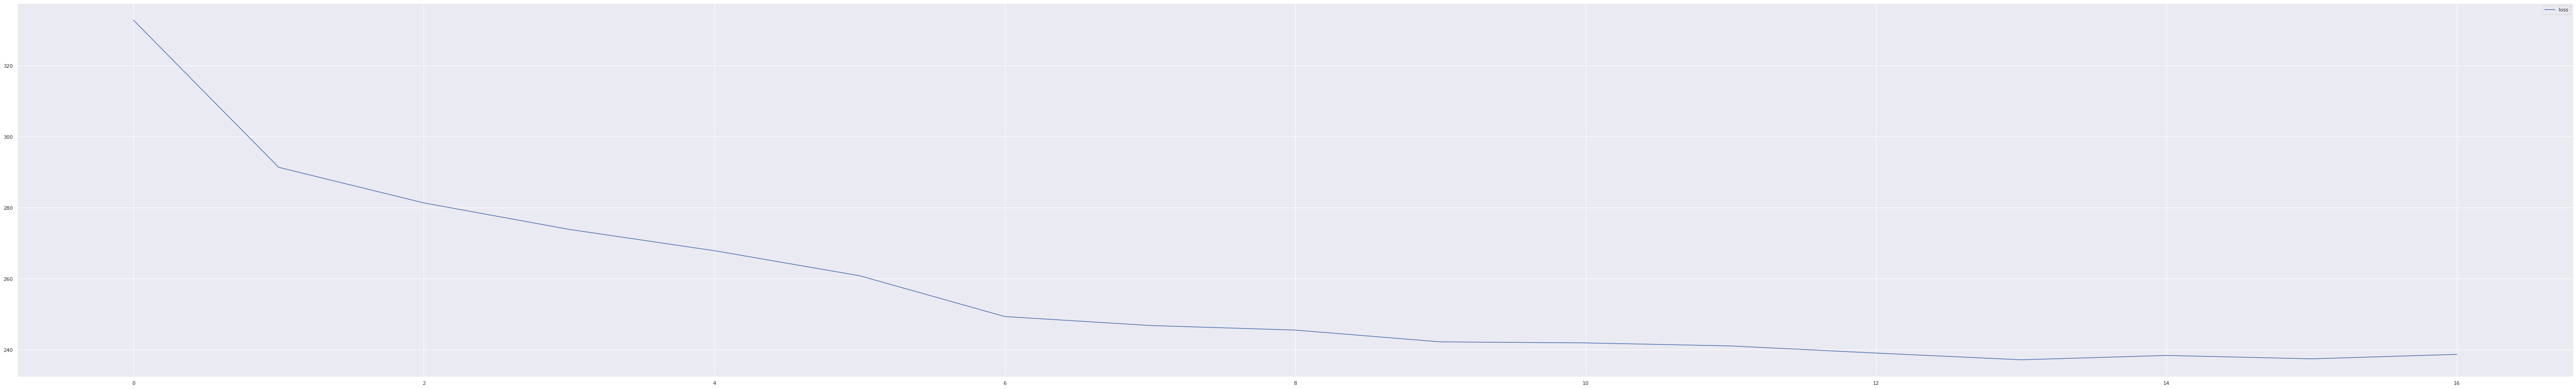

1488.6367242336273


In [ ]:
import torchvision.models as models

start = time.time()


net = Network(dropout=0.3, num_classes=len(labels)).cuda()
train(net, batch_size=24, num_epochs=17)

end = time.time()
print(end - start)

In [ ]:

test_dataset = Dataset(split="test")
test_gen_csv = torch.utils.data.DataLoader(test_dataset)

In [ ]:
print("Nombre d'images pour dataset test", len(test_dataset))

Nombre d'images pour dataset test 6288


In [ ]:
import csv
def submission(net, dico):
  net.eval()
  i=0
  for j, sample in enumerate(test_gen_csv):
    i += 1
    img, question, questionId = sample
    out = net(img.cuda(), question.cuda());

    dico.update({int(questionId[0]):np.argmax(out[0].cpu().detach().numpy())})
  print("taille", i)

In [ ]:
dico = {}
submission(net,dico)

taille 6288


In [ ]:
print(dico)

{312790006: 14, 182756002: 43, 282515007: 77, 330358000: 14, 492166003: 48, 221241001: 76, 249730003: 28, 482801004: 16, 424171002: 34, 393661030: 81, 132386002: 10, 440057005: 63, 346876001: 55, 411885009: 22, 139039006: 27, 207500002: 69, 153829025: 9, 329707011: 43, 68912003: 82, 564316000: 98, 5632000: 25, 535212007: 21, 447457002: 70, 540873005: 24, 542930002: 12, 357810000: 79, 164348001: 5, 34100001: 79, 54541001: 79, 417330005: 14, 414603000: 96, 446880018: 6, 527263000: 43, 306833003: 17, 536496002: 2, 268787001: 30, 268472008: 6, 413585004: 47, 407926007: 9, 40931005: 95, 133273006: 26, 156328003: 43, 222970003: 54, 579713011: 15, 397143001: 88, 383536004: 85, 1025003: 19, 37944000: 22, 524500001: 1, 265160008: 45, 311868022: 26, 544568009: 63, 532744016: 9, 490057001: 78, 316275008: 17, 149610002: 11, 441652008: 31, 18290012: 70, 421562012: 77, 484180002: 12, 277746000: 28, 546890002: 78, 311550008: 40, 502665015: 0, 92001: 0, 522062006: 79, 171038002: 51, 72396009: 59, 4059

In [ ]:
import pandas as pd
from google.colab import files
sub = pd.DataFrame(dico.items(),columns=['id','label'])
sub.to_csv('sub.csv',index=False)
files.download('sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>